In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load and Clean Dataset

In [2]:
df = pd.read_csv("SmartphoneBatteryDrainPrediction.csv")

In [3]:
df.shape

(2060, 11)

In [4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Battery_Drain_Category
0,1,Google Pixel 5,Android,393.0,6.4,67.0,1122.0,40.0,Male,4,High
1,2,OnePlus 9,Android,268.0,4.7,42.0,944.0,47.0,Female,3,High
2,3,Xiaomi Mi 11,Android,154.0,4.0,32.0,322.0,42.0,Male,2,Low
3,4,Google Pixel 5,Android,239.0,4.8,56.0,871.0,20.0,Male,3,High
4,5,iPhone 12,iOS,187.0,4.3,58.0,988.0,31.0,Female,3,High


In [5]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)      float64
Screen On Time (hours/day)    float64
Number of Apps Installed      float64
Data Usage (MB/day)           float64
Age                           float64
Gender                         object
User Behavior Class             int64
Battery_Drain_Category         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     2060 non-null   int64  
 1   Device Model                2045 non-null   object 
 2   Operating System            2039 non-null   object 
 3   App Usage Time (min/day)    2043 non-null   float64
 4   Screen On Time (hours/day)  2046 non-null   float64
 5   Number of Apps Installed    2060 non-null   float64
 6   Data Usage (MB/day)         2060 non-null   float64
 7   Age                         2060 non-null   float64
 8   Gender                      2040 non-null   object 
 9   User Behavior Class         2060 non-null   int64  
 10  Battery_Drain_Category      2060 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 177.2+ KB


In [7]:
df.isnull().sum()

User ID                        0
Device Model                  15
Operating System              21
App Usage Time (min/day)      17
Screen On Time (hours/day)    14
Number of Apps Installed       0
Data Usage (MB/day)            0
Age                            0
Gender                        20
User Behavior Class            0
Battery_Drain_Category         0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
num_cols = df.select_dtypes(['int','float']).columns
cat_cols = df.select_dtypes(['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [10]:
df["Operating System"] = df["Operating System"].str.lower().str.strip()
df["Gender"] = df["Gender"].str.lower().str.strip()

# Outliers

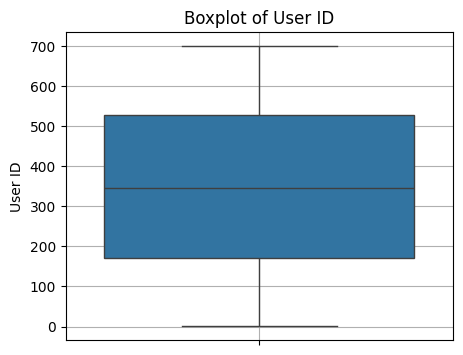

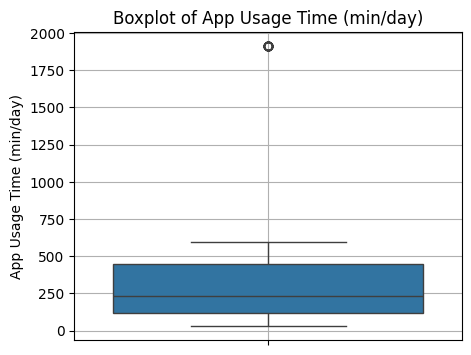

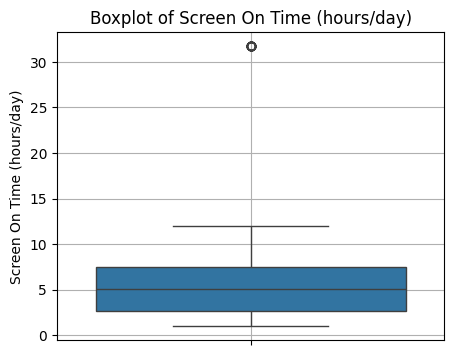

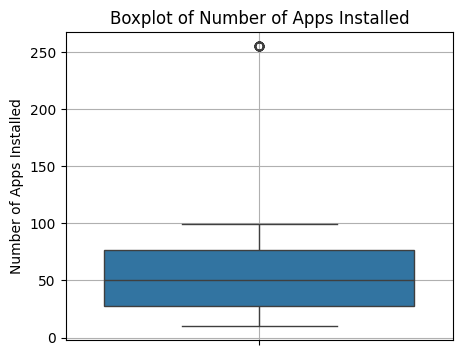

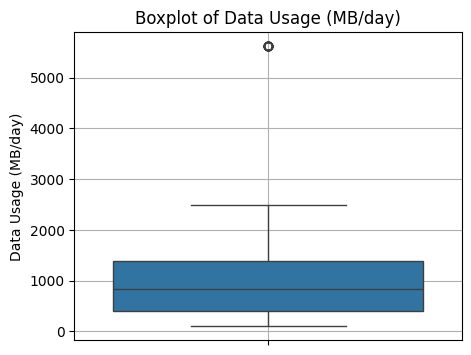

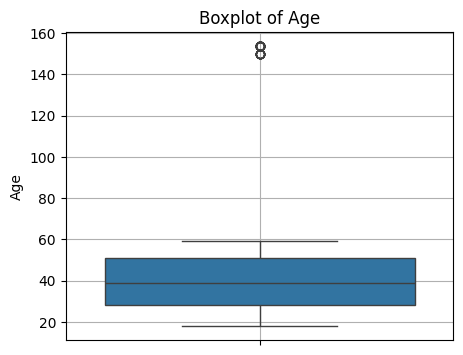

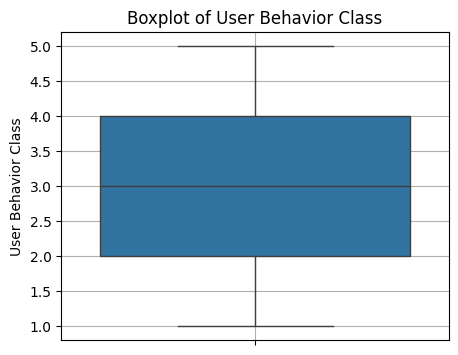

In [11]:
num_cols = df.select_dtypes(['int', 'float']).columns
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid()
    plt.show()

In [12]:
a = df[df["Number of Apps Installed"] > 250].index
df.drop(a, inplace=True)

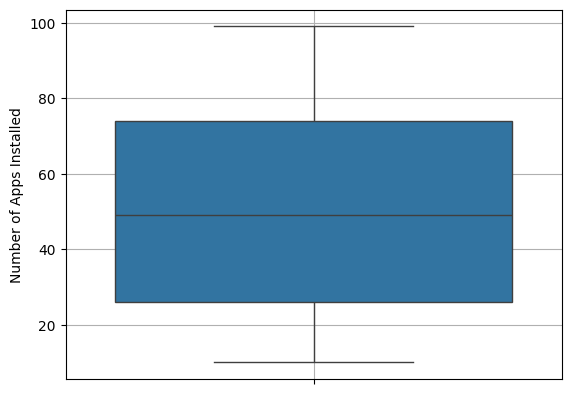

In [13]:
sns.boxplot(data=df, y="Number of Apps Installed")
plt.grid()
plt.show()

# Skewness

In [14]:
from scipy.stats import skew

User ID
0.0031288690007987177


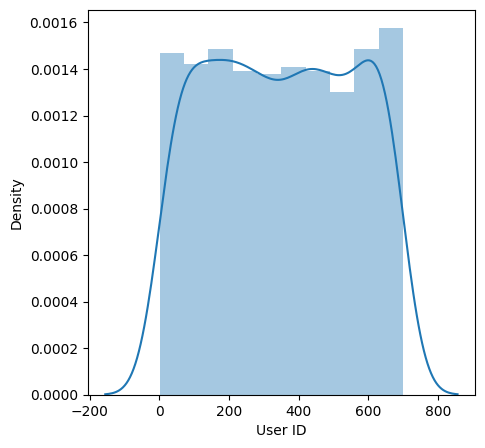

App Usage Time (min/day)
3.3147408464645762


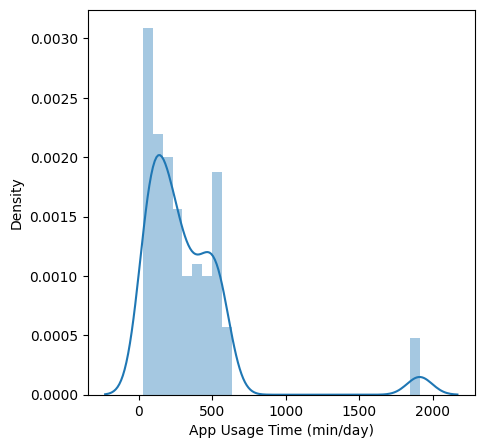

Screen On Time (hours/day)
3.099595203563628


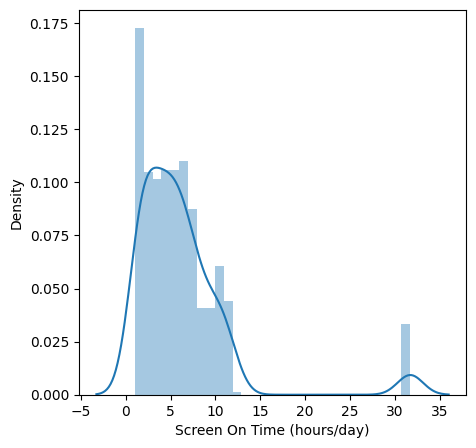

Number of Apps Installed
0.11719097247155671


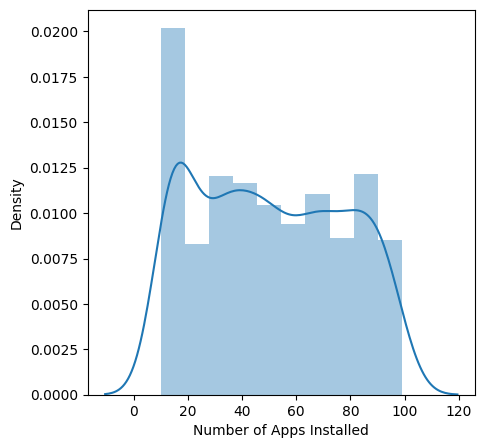

Data Usage (MB/day)
2.7056005009185062


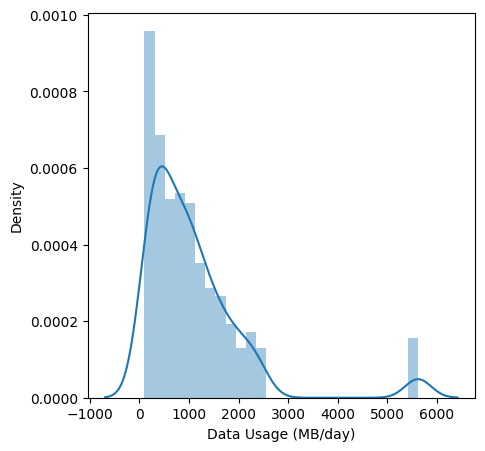

Age
3.123081236871962


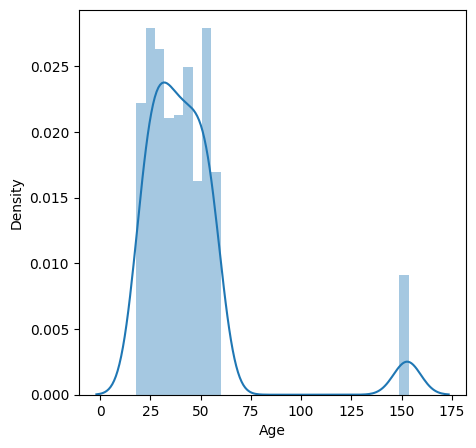

User Behavior Class
0.023418248083103332


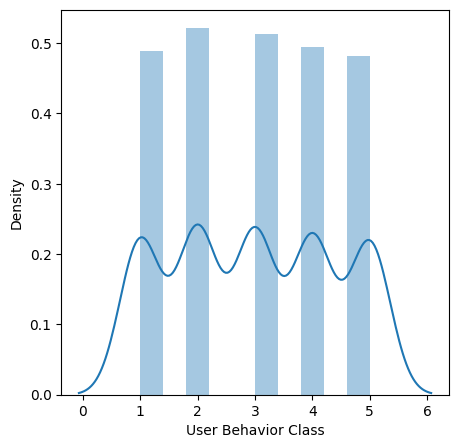

In [15]:
col = df.select_dtypes(['int','float']).columns

for i in col:
    print(i)
    print(skew(df[i]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show()

In [16]:
df["App Usage Time (min/day)"] = np.log1p(df["App Usage Time (min/day)"])
df["Data Usage (MB/day)"] = np.log1p(df["Data Usage (MB/day)"])
df["Age"]= np.log1p(df["Age"])
df["Screen On Time (hours/day)"]= np.log1p(df["Screen On Time (hours/day)"])

In [17]:
skew(df["App Usage Time (min/day)"])

np.float64(-0.05476710690088486)

In [18]:
skew(df["Data Usage (MB/day)"])

np.float64(-0.14981709159995835)

In [19]:
skew(df["Age"])

np.float64(1.0224384970676763)

In [20]:
skew(df["Screen On Time (hours/day)"])

np.float64(0.39265257038702356)

# EDA 

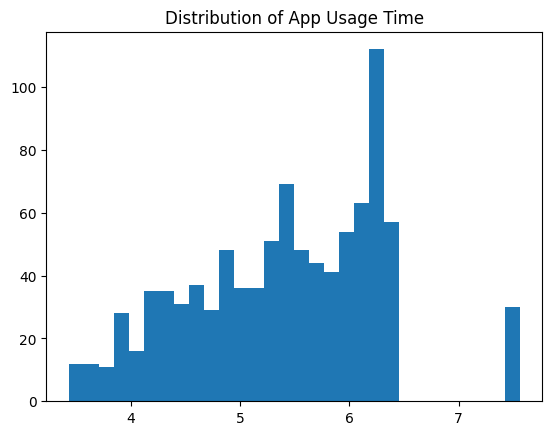

In [21]:
#How is daily app usage time distributed among smartphone users?
plt.hist(df["App Usage Time (min/day)"], bins=30)
plt.title("Distribution of App Usage Time")
plt.show()

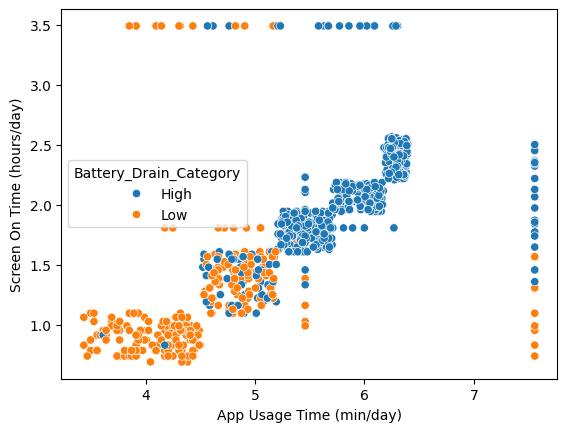

In [22]:
#Is there a relationship between app usage time and screen-on time across battery drain categories?
sns.scatterplot(
    x="App Usage Time (min/day)",
    y="Screen On Time (hours/day)",
    hue="Battery_Drain_Category",
    data=df
)
plt.show()

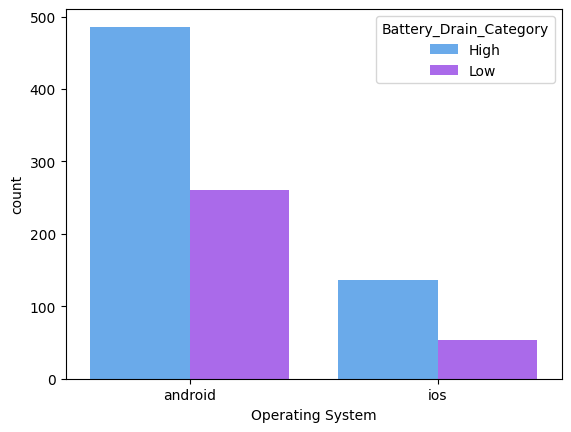

In [23]:
#Does the operating system affect the battery drain category?
sns.countplot(
    x="Operating System",
    hue="Battery_Drain_Category", palette='cool',
    data=df
)
plt.show()

# Feature & Target split

In [24]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
x.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,android,5.976351,2.001480,67.0,7.023759,3.713572,male,4
1,2,OnePlus 9,android,5.594711,1.740466,42.0,6.851185,3.871201,female,3
2,3,Xiaomi Mi 11,android,5.043425,1.609438,32.0,5.777652,3.761200,male,2
3,4,Google Pixel 5,android,5.480639,1.757858,56.0,6.770789,3.044522,male,3
4,5,iPhone 12,ios,5.236442,1.667707,58.0,6.896694,3.465736,female,3


In [26]:
y.head()

0    High
1    High
2     Low
3    High
4    High
Name: Battery_Drain_Category, dtype: object

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Operating System'] = le.fit_transform(df['Operating System'])
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Battery_Drain_Category'] = le.fit_transform(df['Battery_Drain_Category'])


In [30]:
x = df.drop('Battery_Drain_Category', axis=1)
y = df['Battery_Drain_Category']


# Train Test Split 

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



# Logistic Regression

In [35]:
logreg = LogisticRegression(max_iter=50)

logreg.fit(xtrain, ytrain)
ypred_log = logreg.predict(xtest)

print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(ytest, ypred_log))
print(classification_report(ytest, ypred_log))

LOGISTIC REGRESSION
Accuracy: 0.93048128342246
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       118
           1       0.90      0.91      0.91        69

    accuracy                           0.93       187
   macro avg       0.92      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [36]:
print("Training Accuracy:", logreg.score(xtrain, ytrain))
print("Testing Accuracy:", logreg.score(xtest, ytest))

Training Accuracy: 0.9131016042780749
Testing Accuracy: 0.93048128342246


# Decision Tree

In [51]:
dt = DecisionTreeClassifier(max_depth=7, random_state=1)

dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

print("DECISION TREE")
print("Accuracy:", accuracy_score(ytest, ypred_dt))
print(classification_report(ytest, ypred_dt))

DECISION TREE
Accuracy: 0.9197860962566845
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.90      0.88      0.89        69

    accuracy                           0.92       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.92      0.92      0.92       187



In [38]:
print("Training Accuracy:", dt.score(xtrain, ytrain))
print("Testing Accuracy:", dt.score(xtest, ytest))

Training Accuracy: 0.9237967914438503
Testing Accuracy: 0.9518716577540107


# Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=50, random_state=1)

rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

print("RANDOM FOREST")
print("Accuracy:", accuracy_score(ytest, ypred_rf))
print(classification_report(ytest, ypred_rf))

RANDOM FOREST
Accuracy: 0.9358288770053476
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       118
           1       0.90      0.93      0.91        69

    accuracy                           0.94       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.94      0.94      0.94       187



In [40]:
print("Training Accuracy:", rf.score(xtrain, ytrain))
print("Testing Accuracy:", rf.score(xtest, ytest))

Training Accuracy: 0.9879679144385026
Testing Accuracy: 0.9358288770053476


# Gradient Boosting

In [41]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=1)

gb.fit(xtrain, ytrain)
ypred_gb = gb.predict(xtest)

print("GRADIENT BOOSTING")
print("Accuracy:", accuracy_score(ytest, ypred_gb))
print(classification_report(ytest, ypred_gb))

GRADIENT BOOSTING
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       118
           1       0.94      0.90      0.92        69

    accuracy                           0.94       187
   macro avg       0.94      0.93      0.94       187
weighted avg       0.94      0.94      0.94       187



In [42]:
print("Training Accuracy:", gb.score(xtrain, ytrain))
print("Testing Accuracy:", gb.score(xtest, ytest))

Training Accuracy: 0.9812834224598931
Testing Accuracy: 0.9411764705882353


# SVM

In [43]:
svm = SVC(kernel='rbf', C=1)

svm.fit(xtrain, ytrain)
ypred_svm = svm.predict(xtest)

print("SUPPORT VECTOR MACHINE")
print("Accuracy:", accuracy_score(ytest, ypred_svm))
print(classification_report(ytest, ypred_svm))

SUPPORT VECTOR MACHINE
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       118
           1       0.90      0.94      0.92        69

    accuracy                           0.94       187
   macro avg       0.93      0.94      0.94       187
weighted avg       0.94      0.94      0.94       187



In [44]:
print("Training Accuracy:", svm.score(xtrain, ytrain))
print("Testing Accuracy:", svm.score(xtest, ytest))

Training Accuracy: 0.9251336898395722
Testing Accuracy: 0.9411764705882353


# KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)

print("K-NEAREST NEIGHBORS")
print("Accuracy:", accuracy_score(ytest, ypred_knn))
print(classification_report(ytest, ypred_knn))


K-NEAREST NEIGHBORS
Accuracy: 0.893048128342246
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       118
           1       0.88      0.83      0.85        69

    accuracy                           0.89       187
   macro avg       0.89      0.88      0.88       187
weighted avg       0.89      0.89      0.89       187



In [46]:
print("Training Accuracy:", knn.score(xtrain, ytrain))
print("Testing Accuracy:", knn.score(xtest, ytest))

Training Accuracy: 0.9331550802139037
Testing Accuracy: 0.893048128342246


# AdaBoost

In [47]:
ada = AdaBoostClassifier(n_estimators=100, random_state=1)

ada.fit(xtrain, ytrain)
ypred_ada = ada.predict(xtest)

print("ADABOOST")
print("Accuracy:", accuracy_score(ytest, ypred_ada))
print(classification_report(ytest, ypred_ada))


ADABOOST
Accuracy: 0.9197860962566845
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       118
           1       0.95      0.83      0.88        69

    accuracy                           0.92       187
   macro avg       0.93      0.90      0.91       187
weighted avg       0.92      0.92      0.92       187



In [48]:
print("Training Accuracy:", ada.score(xtrain, ytrain))
print("Testing Accuracy:", ada.score(xtest, ytest))

Training Accuracy: 0.9411764705882353
Testing Accuracy: 0.9197860962566845


# XGBoost

In [49]:
xgb = XGBClassifier(
    n_estimators=60,
    max_depth=5,
    learning_rate=0.1,
    random_state=1,
    eval_metric='logloss'
)

xgb.fit(xtrain, ytrain)
ypred_xgb = xgb.predict(xtest)

print("XGBOOST")
print("Accuracy:", accuracy_score(ytest, ypred_xgb))
print(classification_report(ytest, ypred_xgb))

XGBOOST
Accuracy: 0.9518716577540107
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       118
           1       0.95      0.91      0.93        69

    accuracy                           0.95       187
   macro avg       0.95      0.94      0.95       187
weighted avg       0.95      0.95      0.95       187



In [50]:
print("Training Accuracy:", xgb.score(xtrain, ytrain))
print("Testing Accuracy:", xgb.score(xtest, ytest))


Training Accuracy: 0.9812834224598931
Testing Accuracy: 0.9518716577540107


In [52]:
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "SVM",
    "KNN",
    "AdaBoost",
    "XGBoost"
]

accuracies = [
    0.9304,  # Logistic Regression
    0.9197,  # Decision Tree
    0.9358,  # Random Forest
    0.9411,  # Gradient Boosting
    0.9411,  # SVM
    0.8930,  # KNN
    0.9197,  # AdaBoost
    0.9518   # XGBoost
]


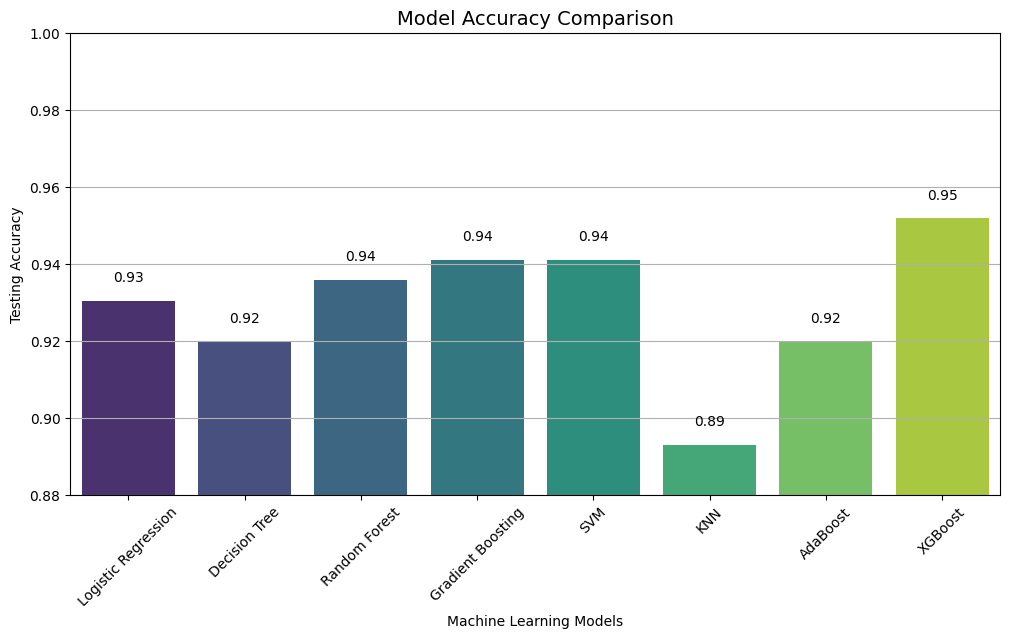

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=models, y=accuracies, palette="viridis")

plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Machine Learning Models")
plt.ylabel("Testing Accuracy")
plt.ylim(0.88, 1.0)
plt.xticks(rotation=45)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center')

plt.grid(axis='y')
plt.show()
